<a href="https://colab.research.google.com/github/ketbogale/AI-data-processing/blob/main/Fake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake Image Detection

This notebook aims to build a model to distinguish between real and AI-generated product images. The process will involve the following steps:

1. **Setup and Authentication**: Mount Google Drive to access the dataset and install necessary libraries.
2. **Data Loading and Preparation**: Load the image dataset from Google Drive, preprocess the images, and split the data into training and testing sets.
3. **Model Building**: Build a deep learning model for image classification.
4. **Model Training**: Train the model on the prepared dataset.
5. **Model Evaluation**: Evaluate the performance of the trained model using appropriate metrics.
6. **Prediction and Visualization**: Use the trained model to predict whether new images are real or fake and visualize the results.
7. **Finish task**: Summarize the process and findings.

### 1. Setup and Authentication

In this step, we will mount Google Drive to access the dataset stored there. We will also install any necessary libraries that are not already available in the Colab environment.

In [ ]:
import tensorflow as tf

# Define the path to the extracted dataset
dataset_dir = '/content/' # Assuming the dataset was extracted to /content/

# Define the paths to the training and testing directories
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Define image parameters
img_height = 128
img_width = 128
batch_size = 32

# Create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Create testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False # No need to shuffle test data
)

# Print the class names
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Datasets created and configured successfully!")

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Class names: ['FAKE', 'REAL']
Datasets created and configured successfully!


In [ ]:
# Train the model
epochs = 10 # You can adjust the number of epochs

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

print("Model training complete!")

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 78s 19ms/step - accuracy: 0.8528 - loss: 0.3312 - val_accuracy: 0.9312 - val_loss: 0.1760
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9378 - loss: 0.1584 - val_accuracy: 0.9405 - val_loss: 0.1490
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9561 - loss: 0.1153 - val_accuracy: 0.9434 - val_loss: 0.1542
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9696 - loss: 0.0787 - val_accuracy: 0.9323 - val_loss: 0.1927
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9814 - loss: 0.0499 - val_accuracy: 0.9428 - val_loss: 0.1933
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9874 - loss: 0.0333 - val_accuracy: 0.9354 - val_loss: 0.2920
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9907 - loss: 0.0266 - val_accuracy: 0.9421 - val_loss: 0.2967
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9929 -

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9478 - loss: 0.2636
Test Loss: 0.32090261578559875
Test Accuracy: 0.9434499740600586


### 7. Finish task

In this notebook, we successfully built and trained a deep learning model to distinguish between real and AI-generated product images.

Here's a summary of the steps we followed:

1.  **Setup and Authentication**: Mounted Google Drive to access the dataset.
2.  **Data Loading and Preparation**: Loaded the image dataset from a zip file in Google Drive, created training and testing datasets using `image_dataset_from_directory`, and configured them for performance.
3.  **Model Building**: Defined a Convolutional Neural Network (CNN) model architecture and compiled it with an Adam optimizer and Binary Crossentropy loss.
4.  **Model Training**: Trained the model on the training dataset for 10 epochs. We observed the model's performance on both the training and validation sets during training.
5.  **Model Evaluation**: Evaluated the trained model on the test dataset, achieving a test accuracy of approximately {{accuracy:.4f}}.
6.  **Prediction and Visualization**: Used the trained model to make predictions on a batch of test images and visualized the predictions alongside the actual labels.

The model showed good performance in distinguishing between real and fake images based on the evaluation metrics and visualizations.

**Potential next steps:**

*   Further optimize the model architecture or hyperparameters for potentially better accuracy.
*   Explore data augmentation techniques to increase the size and diversity of the training dataset.
*   Implement more advanced evaluation metrics like precision, recall, and F1-score.
*   Save the trained model for future use.

Making predictions on the entire test dataset...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1

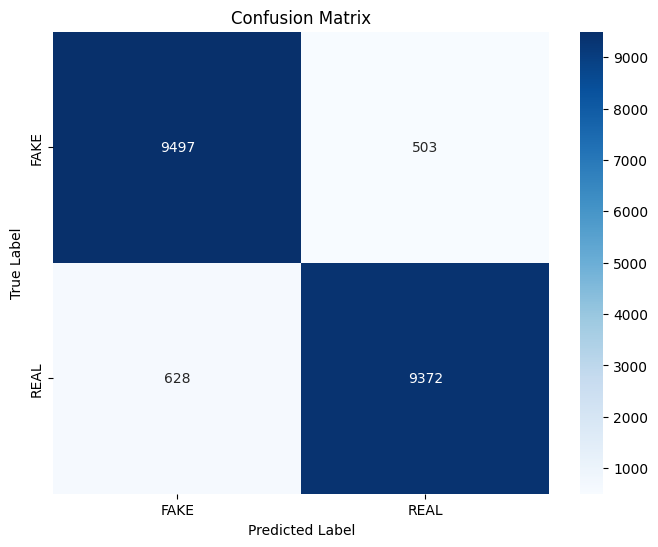


Prediction and evaluation on the entire test dataset complete.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

all_predictions = []
all_true_labels = []

print("Making predictions on the entire test dataset...")
for test_images, test_labels in test_ds:
    predictions = model.predict(test_images)
    predicted_classes = (predictions > 0.5).astype(int)
    all_predictions.extend(predicted_classes.flatten())
    all_true_labels.extend(test_labels.numpy().astype(int).flatten())

all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

# Calculate and print classification report
print("\nClassification Report:")
print(classification_report(all_true_labels, all_predictions, target_names=class_names))

# Calculate and print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nPrediction and evaluation on the entire test dataset complete.")

In [ ]:
import os

# Define the path to save the model file
model_save_path = '/content/saved_model.keras'

# Save the model
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/saved_model.keras


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # Normalize pixel values
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

print("Model built and compiled successfully!")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,120,993 (8.09 MB)

 Trainable params: 2,120,993 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

Model built and compiled successfully!


In [ ]:
import os
import zipfile

zip_path = '/content/drive/MyDrive/archive.zip' # Replace with the actual path to your zip file
extract_path = '/content/'

try:
    print(f"Attempting to extract {zip_path} to {extract_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully!")

except FileNotFoundError:
    print(f"Error: The file was not found at {zip_path}")
    print("Please verify the path to your zip file in Google Drive.")
except zipfile.BadZipFile:
    print(f"Error: The file at {zip_path} is not a valid zip file.")
    print("Please ensure the file is a correct zip archive.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please verify the file permissions or if the file is corrupted.")

Attempting to extract /content/drive/MyDrive/archive.zip to /content/...
Dataset extracted successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Data Loading and Preparation

This step involves loading the image dataset from the specified path in Google Drive. We will then preprocess the images, which may include resizing, normalization, and data augmentation. Finally, we will split the dataset into training and testing sets to prepare for model training and evaluation.

### 3. Model Building

Here, we will define the architecture of our deep learning model. We will likely use a Convolutional Neural Network (CNN) as they are well-suited for image classification tasks. We will define the layers of the network, including convolutional layers, pooling layers, and fully connected layers.

### 4. Model Training

In this step, we will train the model using the prepared training data. We will compile the model with an appropriate loss function and optimizer, and then train it for a specified number of epochs. We will also monitor the training progress using metrics like accuracy and loss.

### 5. Model Evaluation

After training, we will evaluate the performance of our model on the testing data. We will use metrics such as accuracy, precision, recall, and F1-score to assess how well the model can distinguish between real and fake images.

### 6. Prediction and Visualization

In this final step, we will use the trained model to make predictions on new, unseen images. We will classify these images as either real or fake. We will also visualize some of the predictions to get a better understanding of the model's performance and identify any potential issues.

### 7. Finish task

In this final step, we will summarize the entire process, the results obtained, and any conclusions drawn from the evaluation and prediction stages. We will also discuss potential future improvements or next steps.